# Multimodal RAG using:

*   ## Copaldi (vidore/colpali-v1.2) for image-indexed as KB using - Byaldi
*   ## Groq (qwen/qwen3-32b)



### Mandatory Installations:

*   byaldi  
*   qwen-vl-utils
*   pdf2image
*   transformers



In [ ]:
!pip install byaldi pdf2image qwen-vl-utils transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 517.9/517.9 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.6/88.6 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 MB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.7/180.7 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.8/304.8 kB 13.5 MB/s eta 0:00:00


In [ ]:
import requests
import os

pdfs = {
    "Window": "https://www.westoxon.gov.uk/media/ksqgvl4b/10-design-guide-windows-and-doors.pdf",
    "Roofs": "https://www.westoxon.gov.uk/media/d3ohnpd1/9-design-guide-roofs-and-roofing-materials.pdf",
    "Extensions": "https://www.westoxon.gov.uk/media/pekfogvr/14-design-guide-extensions-and-alterations.pdf",
    "Greener": "https://www.westoxon.gov.uk/media/thplpsay/16-design-guide-greener-traditional-buildings.pdf",
    "Sustainable": "https://www.westoxon.gov.uk/media/nk5bvv0v/12-design-guide-sustainable-building-design.pdf"
}

output_dir = "dataset"
os.makedirs(output_dir, exist_ok=True)

for name, url in pdfs.items():
    response = requests.get(url)
    pdf_path = os.path.join(output_dir, f"{name}.pdf")


    with open(pdf_path, "wb") as f:
        f.write(response.content)

In [ ]:
!apt-get install poppler-utils

import os
from pdf2image import convert_from_path

def convert_pdfs_to_images(folder):
    pdf_files = [f for f in os.listdir(folder) if f.endswith('.pdf')]
    all_images = {}

    for doc_id, pdf_file in enumerate(pdf_files):
        pdf_path = os.path.join(folder, pdf_file)
        images = convert_from_path(pdf_path, dpi=100)
        all_images[doc_id] = images

    return all_images

all_images = convert_pdfs_to_images("/content/dataset")

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 41 not upgraded.
Need to get 186 kB of archives.
After this operation, 697 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.12 [186 kB]
Fetched 186 kB in 0s (462 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 121703 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.12_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.12) ...
Setting up poppler-utils (22.02.0-2ubuntu0.12) ...
Processing triggers for man-db (2.10.2-1) ...


IndexError: list index out of range

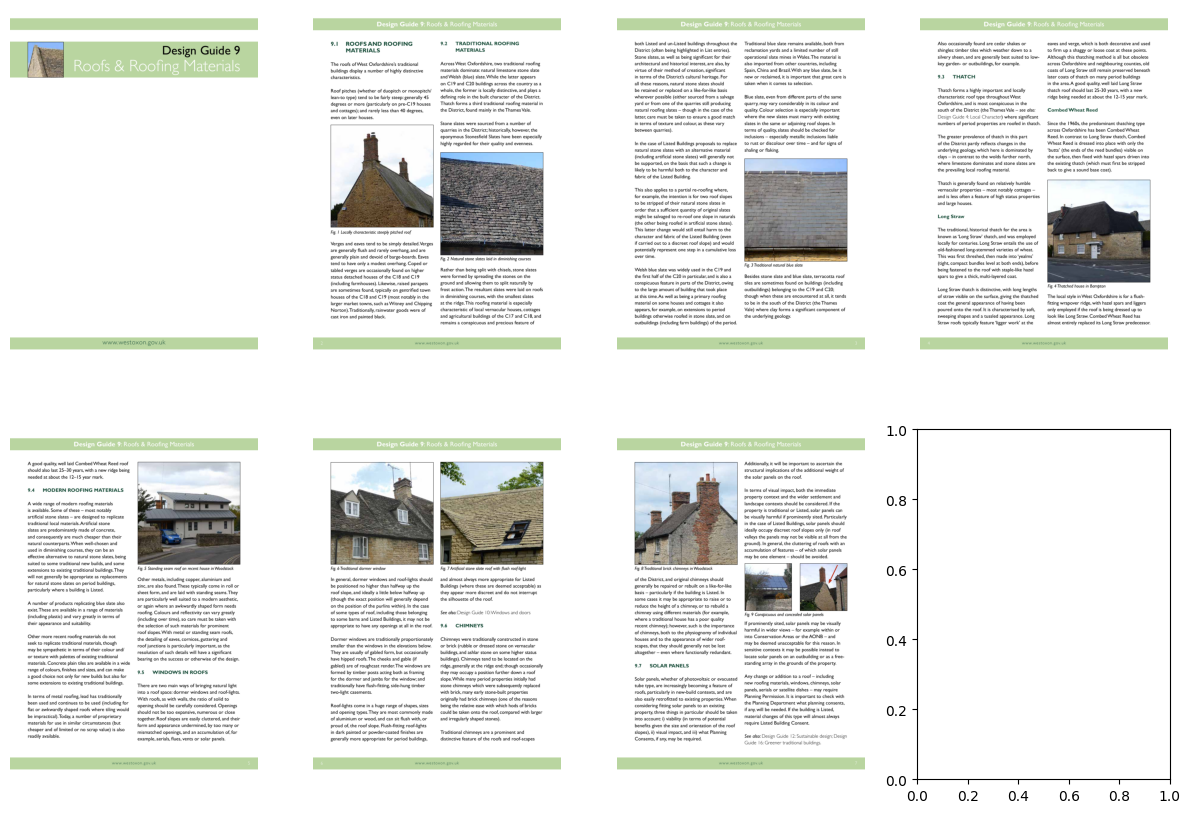

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 4, figsize=(15, 10))

for i, ax in enumerate(axes.flat):
    img = all_images[0][i]
    ax.imshow(img)
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
from byaldi import RAGMultiModalModel

colpali_model = RAGMultiModalModel.from_pretrained("vidore/colpali-v1.2")

`torch_dtype` is deprecated! Use `dtype` instead!


Verbosity is set to 1 (active). Pass verbose=0 to make quieter.


adapter_config.json:   0%|          | 0.00/750 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/862M [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

adapter_model.safetensors:   0%|          | 0.00/78.6M [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/700 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.json:   0%|          | 0.00/17.8M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/733 [00:00<?, ?B/s]

In [ ]:
colpali_model.index(
    input_path="dataset/",
    index_name="image_index",
    store_collection_with_index=False,
    overwrite=True
)

Indexing file: dataset/Roofs.pdf
Added page 1 of document 0 to index.
Added page 2 of document 0 to index.
Added page 3 of document 0 to index.
Added page 4 of document 0 to index.
Added page 5 of document 0 to index.
Added page 6 of document 0 to index.
Added page 7 of document 0 to index.
Index exported to .byaldi/image_index
Indexing file: dataset/Window.pdf
Added page 1 of document 1 to index.
Added page 2 of document 1 to index.
Added page 3 of document 1 to index.
Added page 4 of document 1 to index.
Added page 5 of document 1 to index.
Added page 6 of document 1 to index.
Added page 7 of document 1 to index.
Added page 8 of document 1 to index.
Added page 9 of document 1 to index.
Added page 10 of document 1 to index.
Added page 11 of document 1 to index.
Index exported to .byaldi/image_index
Indexing file: dataset/Extensions.pdf
Added page 1 of document 2 to index.
Added page 2 of document 2 to index.
Added page 3 of document 2 to index.
Added page 4 of document 2 to index.
Add

{0: 'dataset/Roofs.pdf',
 1: 'dataset/Window.pdf',
 2: 'dataset/Extensions.pdf',
 3: 'dataset/Greener.pdf',
 4: 'dataset/Sustainable.pdf'}

In [ ]:
query = "How should we design greener and sustainable house?"

results = colpali_model.search(query, k=2)
results

[{'doc_id': 4, 'page_num': 3, 'score': 11.375, 'metadata': {}, 'base64': None},
 {'doc_id': 4, 'page_num': 11, 'score': 11.25, 'metadata': {}, 'base64': None}]

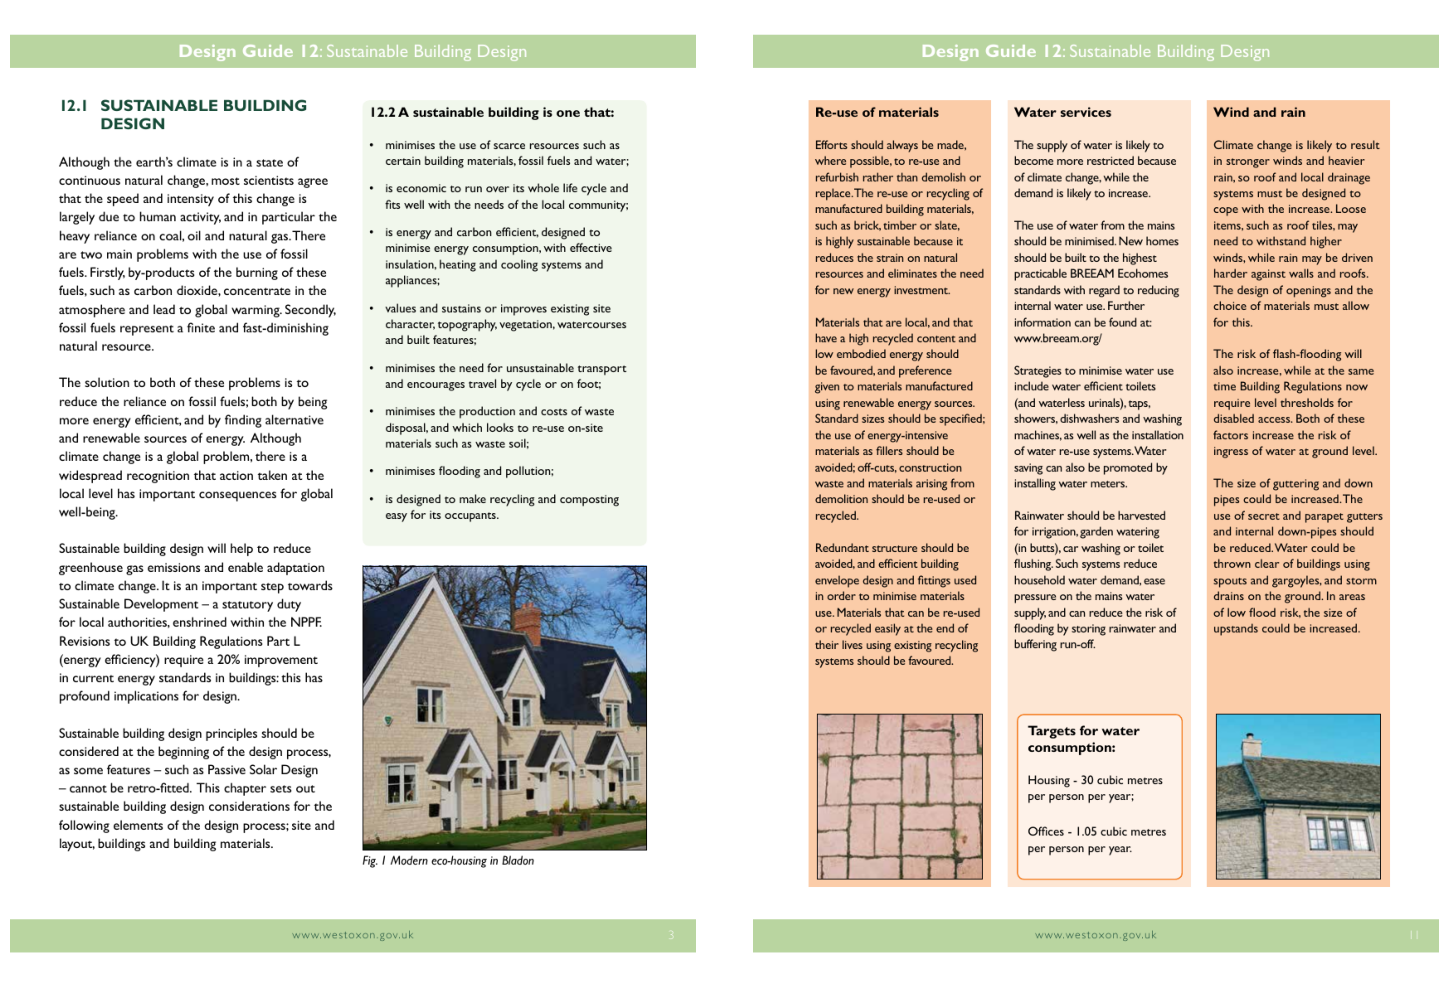

In [ ]:
import matplotlib.pyplot as plt

def get_result_images(results, all_images):
    grouped_images = []

    for result in results:
        doc_id = result['doc_id']
        page_num = result['page_num']
        grouped_images.append(all_images[doc_id][page_num - 1])
    return grouped_images
result_images = get_result_images(results, all_images)

fig, axes = plt.subplots(1, 2, figsize=(15, 10))

for i, ax in enumerate(axes.flat):
    img = result_images[i]
    ax.imshow(img)
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
chat_template = [
    {
        "role": "user",
        "content": [
            {
                "type": "image",
                "image": result_images[0],
            },
             {
                 "type": "image",
                "image": result_images[1],
            },
            {
                "type": "text",
                "text": query
            },
        ],
    }
]

text = vl_model_processor.apply_chat_template(
    chat_template, tokenize=False, add_generation_prompt=True
)

### Set up Groq API

To use the Groq API, you'll need an API key. If you don't already have one, create a key on the [Groq Console](https://console.groq.com/keys). In Colab, add the key to the secrets manager under the "🔑" icon in the left panel. Give it the name `GROQ_API_KEY`. Then, we'll configure the client.

In [ ]:
!pip install groq

import os
from groq import Groq
from google.colab import userdata
from PIL import Image
import io
import base64

# Configure Groq client
GROQ_API_KEY = userdata.get('GROQ_API_KEY')
client = Groq(
    api_key=GROQ_API_KEY,
)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.0/136.0 kB 7.1 MB/s eta 0:00:00


Next, we need to convert your PIL Image objects into base64 encoded data URLs, which is a common way to send image data to multimodal models via APIs.

In [ ]:
def pil_to_base64_data_url(image: Image.Image) -> str:
    buffered = io.BytesIO()
    # Convert to RGB if not already to avoid issues with modes like P
    if image.mode != 'RGB':
        image = image.convert('RGB')
    image.save(buffered, format="JPEG") # Use JPEG for smaller size
    img_str = base64.b64encode(buffered.getvalue()).decode("utf-8")
    return f"data:image/jpeg;base64,{img_str}"

# Convert your result_images to base64 data URLs
image_data_urls = [pil_to_base64_data_url(img) for img in result_images]

# Prepare the messages for the Groq API call
# Temporarily setting content to a string to bypass the API error
messages = [
    {
        "role": "user",
        "content": query # Changed to a string to match API error requirement
    }
]

# The image data will not be included in the API call due to the error,
# but we keep image_data_urls for potential future use or debugging.
# The loop to add images to content is removed for now.


Now we can make the call to the Groq API with the prepared messages.

In [ ]:
print(f"Sending query to Groq: '{query}' with {len(image_data_urls)} images.")

completion = client.chat.completions.create(
    model="qwen/qwen3-32b",
    messages=messages,
    temperature=0.6,
    max_completion_tokens=4096,
    top_p=0.95,
    reasoning_effort="default",
    stream=True,
    stop=None
)

print("Groq Response:")
for chunk in completion:
    print(chunk.choices[0].delta.content or "", end="")
print()

Sending query to Groq: 'How should we design greener and sustainable house?' with 2 images.
Groq Response:
<think>
Okay, the user is asking how to design greener and sustainable houses. Let me start by breaking down the key aspects they might be interested in. First, I should consider energy efficiency because that's a big part of sustainability. Maybe mention renewable energy sources like solar panels or wind turbines. Then there's water conservation—rainwater harvesting, greywater systems, and low-flow fixtures come to mind.

Materials are another important factor. Using recycled or locally sourced materials can reduce the carbon footprint. Oh, and maybe non-toxic materials for indoor air quality. Insulation is crucial too for energy efficiency; materials like sheep's wool or recycled denim could be good examples.

Designing for passive solar heating and cooling might be something they haven't considered. Orientation of the house, thermal mass, and natural ventilation can make a big 